### Task 1: Data Profiling to Understand Data Quality
**Description**: Use basic statistical methods to profile a dataset and identify potential quality issues.

**Steps**:
1. Load the dataset using pandas in Python.
2. Understand the data by checking its basic statistics.
3. Identify null values.
4. Check unique values for categorical columns.
5. Review outliers using box plots.

=== Descriptive Statistics ===
         Name        Age Gender         Income
count       9   9.000000     10       9.000000
unique      9        NaN      2            NaN
top     Alice        NaN      F            NaN
freq        1        NaN      6            NaN
mean      NaN  37.222222    NaN   70222.222222
std       NaN  12.617228    NaN   26966.543057
min       NaN  22.000000    NaN   47000.000000
25%       NaN  28.000000    NaN   50000.000000
50%       NaN  35.000000    NaN   60000.000000
75%       NaN  45.000000    NaN   75000.000000
max       NaN  60.000000    NaN  120000.000000

=== Missing Values ===
Name      1
Age       1
Gender    0
Income    1
dtype: int64

=== Unique Values in Categorical Columns ===
Name: 9 unique values - ['Alice' 'Bob' 'Charlie' 'David' 'Eve' 'Frank' 'Grace' 'Helen' None 'Ivy']
Gender: 2 unique values - ['F' 'M']


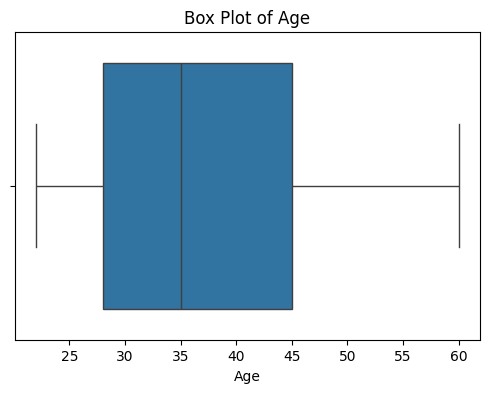

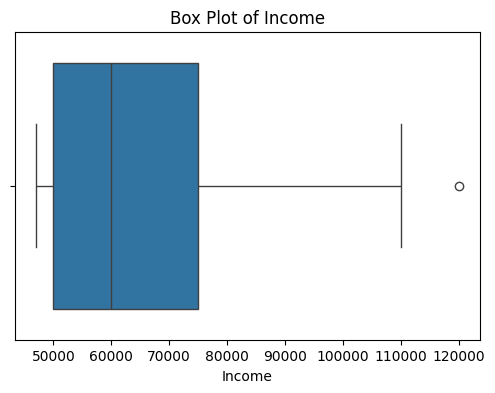

In [1]:
# write your code from here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load a sample dataset
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Helen", None, "Ivy"],
    "Age": [25, 30, 35, 40, None, 50, 28, 60, 22, 45],
    "Gender": ["F", "M", "M", "M", "F", "M", "F", "F", "F", "F"],
    "Income": [50000, 60000, 75000, 120000, 48000, None, 58000, 110000, 47000, 64000]
}
df = pd.DataFrame(data)

# Step 2: Basic statistics
print("=== Descriptive Statistics ===")
print(df.describe(include='all'))

# Step 3: Identify null values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Step 4: Unique values for categorical columns
print("\n=== Unique Values in Categorical Columns ===")
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].nunique()} unique values - {df[col].unique()}")

# Step 5: Outliers using box plots
numerical_columns = df.select_dtypes(include='number').columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

### Task 2: Implement Simple Data Validation
**Description**: Write a Python script to validate the data types and constraints of each column in a dataset.

**Steps**:
1. Define constraints for each column.
2. Validate each column based on its constraints.

In [2]:
# write your code from here
import pandas as pd
import numpy as np

# Sample dataset
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve", None],
    "Age": [25, 30, 35, None, 28, 42],
    "Email": ["alice@example.com", "bob@example.com", None, "david@domain", "eve@example.com", "frank@site.com"],
    "Salary": [50000, 60000, 75000, 40000, None, -10000]
}
df = pd.DataFrame(data)

# Define constraints
constraints = {
    "Name": {"type": str, "not_null": True},
    "Age": {"type": (int, float), "not_null": True, "min": 18, "max": 65},
    "Email": {"type": str, "not_null": True, "contains": "@"},
    "Salary": {"type": (int, float), "not_null": True, "min": 0}
}

# Validation function
def validate(df, constraints):
    results = []
    for column, rules in constraints.items():
        for index, value in df[column].items():
            errors = []
            if rules.get("not_null") and pd.isnull(value):
                errors.append("NULL")
            if "type" in rules and not pd.isnull(value):
                if not isinstance(value, rules["type"]):
                    errors.append("WRONG TYPE")
            if "min" in rules and not pd.isnull(value):
                if value < rules["min"]:
                    errors.append("BELOW MIN")
            if "max" in rules and not pd.isnull(value):
                if value > rules["max"]:
                    errors.append("ABOVE MAX")
            if "contains" in rules and not pd.isnull(value):
                if rules["contains"] not in str(value):
                    errors.append(f"MISSING '{rules['contains']}'")
            if errors:
                results.append({"Row": index, "Column": column, "Value": value, "Issues": ", ".join(errors)})
    return pd.DataFrame(results)

# Run validation
validation_report = validate(df, constraints)

# Output
print("=== Validation Report ===")
print(validation_report if not validation_report.empty else "No issues found.")

=== Validation Report ===
   Row  Column    Value     Issues
0    5    Name      NaN       NULL
1    3     Age      NaN       NULL
2    2   Email      NaN       NULL
3    4  Salary      NaN       NULL
4    5  Salary -10000.0  BELOW MIN


### Task 3: Detect Missing Data Patterns
**Description**: Analyze and visualize missing data patterns in a dataset.

**Steps**:
1. Visualize missing data using a heatmap.
2. Identify patterns in missing data.

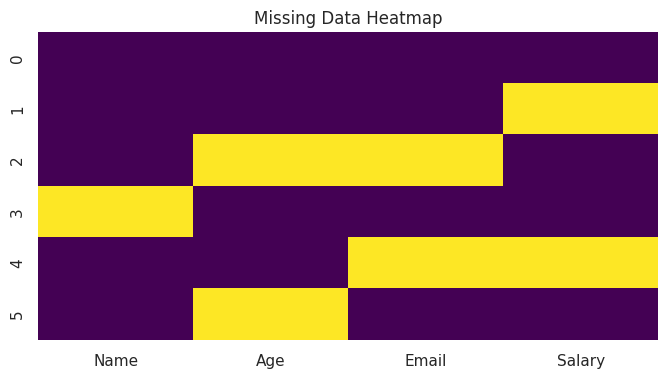

=== Missing Data Pattern Summary ===
        Missing Count  Missing Percentage
Name                1               16.67
Age                 2               33.33
Email               2               33.33
Salary              2               33.33


In [3]:
# write your code from here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset with missing values
data = {
    "Name": ["Alice", "Bob", "Charlie", None, "Eve", "Frank"],
    "Age": [25, 30, None, 40, 28, None],
    "Email": ["alice@example.com", "bob@example.com", None, "david@domain.com", None, "frank@site.com"],
    "Salary": [50000, None, 75000, 40000, None, -10000]
}
df = pd.DataFrame(data)

# Set visual style
sns.set(style="whitegrid")

# Step 1: Visualize missing data as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=True)
plt.title("Missing Data Heatmap")
plt.show()

# Step 2: Identify patterns in missing data
missing_summary = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

pattern_df = pd.DataFrame({
    "Missing Count": missing_summary,
    "Missing Percentage": missing_percent
})

print("=== Missing Data Pattern Summary ===")
print(pattern_df)

### Task 4: Integrate Automated Data Quality Checks
**Description**: Integrate automated data quality checks using the Great Expectations library for a dataset.

**Steps**:
1. Install and initialize Great Expectations.
2. Set up Great Expectations.
3. Add further checks and validate.

In [16]:
import pandas as pd
import great_expectations as gx
from great_expectations.datasource.fluent import PandasDatasource
from great_expectations.execution_engine import PandasExecutionEngine
from great_expectations.datasource.fluent.data_connectors import RuntimeDataConnector
import tempfile
import shutil

# Sample DataFrame
df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", None, "Eve"],
    "Age": [25, 30, 35, 40, None],
    "Email": ["alice@example.com", "bob@example.com", None, "david@domain.com", "eve@domain.com"]
})

# Temporary directory for GE context
temp_dir = tempfile.mkdtemp()

# Initialize GE context
context = gx.get_context(context_root_dir=temp_dir)

# Create Execution Engine object
execution_engine = PandasExecutionEngine()

# Create Data Connector object
runtime_data_connector = RuntimeDataConnector(
    name="default_runtime_data_connector_name",
    batch_identifiers=["default_identifier"],
)

# Create PandasDatasource with objects, NOT dicts
pandas_datasource = PandasDatasource(
    name="my_pandas",
    execution_engine=execution_engine,
    data_connectors={"default_runtime_data_connector_name": runtime_data_connector},
)

# Add datasource to context
context.add_datasource(datasource=pandas_datasource)

# Build batch request with runtime batch data (your DataFrame)
batch_request = {
    "datasource_name": "my_pandas",
    "data_connector_name": "default_runtime_data_connector_name",
    "data_asset_name": "my_data_asset",
    "runtime_parameters": {"batch_data": df},
    "batch_identifiers": {"default_identifier": "default_identifier_value"},
}

# Create expectation suite
suite_name = "my_suite"
context.add_expectation_suite(expectation_suite_name=suite_name)

# Get validator
validator = context.get_validator(batch_request=batch_request, expectation_suite_name=suite_name)

# Add expectations
validator.expect_column_values_to_not_be_null("Name")
validator.expect_column_values_to_not_be_null("Age")
validator.expect_column_values_to_match_regex("Email", r".+@.+\..+", mostly=0.9)

# Save expectation suite
validator.save_expectation_suite()

# Create and run checkpoint
checkpoint = context.add_or_update_checkpoint(
    name="dq_checkpoint",
    validations=[{"batch_request": batch_request, "expectation_suite_name": suite_name}],
)

results = checkpoint.run()

print(results["run_results"])

# Cleanup
shutil.rmtree(temp_dir)

ModuleNotFoundError: No module named 'great_expectations.datasource.fluent.data_connectors'